In [1]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:

import os

import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Concatenate
from keras.models import Sequential
import keras
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, BatchNormalization, Activation
from keras.models import Model
import matplotlib.image as mpimg
from glob import glob
from keras.layers.convolutional import Conv2DTranspose
from keras.layers import concatenate
import struct


Using TensorFlow backend.


In [0]:
# print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/train')))
# print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/train')))
# # 3600
# # 3600

3600
3600


In [0]:
# print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/test/')))
# print(len(os.listdir('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/test/')))
# # 354
# # 354

354
354


In [0]:
# ndct = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/train/*'))
# ldct = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/train/*'))

# ndct_test = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/test/*'))
# ldct_test = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/test/*'))

# print(len(ndct))
# print(len(ldct))
# print(len(ndct_test))
# print(len(ldct_test))

3600
3600
354
354


In [0]:
def cal_psnr(im1, im2):
    # assert pixel value range is 0-255 and type is uint8
    mse = ((im1.astype(np.float) - im2.astype(np.float)) ** 2).mean()
    maxval = np.amax(im1)
    psnr = 10 * np.log10(maxval ** 2 / mse)
    return psnr

def tf_psnr(im1, im2):
    # assert pixel value range is 0-1
    #mse = tf.losses.mean_squared_error(labels=im2 * 255.0, predictions=im1 * 255.0)
    mse = tf.compat.v1.losses.mean_squared_error(labels=im2 * 255.0, predictions=im1 * 255.0)
    return 10.0 * (tf.log(255.0 ** 2 / mse) / tf.log(10.0))

In [0]:
# ndct_imgs_train = []
# for i in range(0, len(ndct)):                                                                                                                                      
# #for i in range(0, 1600):
#     f = open(ndct[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ndct_imgs_train.append(a)
#     f.close()
# print("len(ndct_imgs_train)....: ",len(ndct_imgs_train))
                                                                                                                                                         

len(ndct_imgs_train)....:  3600


In [0]:
# ldct_imgs_train = []
# for i in range(0, len(ldct)):
# #for i in range(0, 1600):
#     f = open(ldct[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ldct_imgs_train.append(a)
#     f.close()
# print("len(ldct_imgs_train)....: ",len(ldct_imgs_train))

len(ldct_imgs_train)....:  3600


In [0]:
# ndct_imgs_test = []
# for i in range(0, len(ndct_test)):
# #for i in range(0, 10):
#     f = open(ndct_test[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ndct_imgs_test.append(a)
#     f.close()
# print("len(ndct_imgs_test)....: ",len(ndct_imgs_test))


len(ndct_imgs_test)....:  354


In [0]:
# # load the image
# ldct_imgs_test = []
# for i in range(0, len(ldct_test)):
# #for i in range(0, 10):
#     f = open(ldct_test[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ldct_imgs_test.append(a)
#     f.close()
# print("len(ldct_imgs_test)....: ",len(ldct_imgs_test))


len(ldct_imgs_test)....:  354


In [0]:
# ldct_train = np.asarray(ldct_imgs_train)
# ndct_train = np.asarray(ndct_imgs_train)

# ldct_train = ldct_train.reshape(3600,512,512,1)
# ndct_train = ndct_train.reshape(3600,512,512,1)

# ldct_test = np.asarray(ldct_imgs_test)
# ndct_test = np.asarray(ndct_imgs_test)

# ldct_test = ldct_test.reshape(len(ldct_imgs_test),512,512,1)
# ndct_test = ndct_test.reshape(len(ldct_imgs_test),512,512,1)

# print(ldct_train.shape)
# print(ndct_train.shape)
# print(ldct_test.shape)
# print(ndct_test.shape)


(3600, 512, 512, 1)
(3600, 512, 512, 1)
(354, 512, 512, 1)
(354, 512, 512, 1)


In [0]:
# np.save('sparseview_60_train', ldct_train) # save the file as "sparseview_60_train.npy" 
# np.save('ndct_train', ndct_train) # save the file as "ndct_train.npy" 

# np.save('sparseview_60_test', ldct_test) # save the file as "sparseview_60_test.npy" 
# np.save('ndct_test', ndct_test) # save the file as "ndct_test.npy" 


In [0]:
sparseview_60_train = np.load('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/sparseview_60_train.npy') # loads saved array into variable sparseview_60_train.
ndct_train = np.load('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/ndct_train.npy') # loads saved array into variable ndct_train.
sparseview_60_test = np.load('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/sparseview_60_test.npy') # loads saved array into variable sparseview_60_test.
ndct_test = np.load('/content/drive/My Drive/Colab Notebooks/dncnn_keras_colab_notebook/ndct_test.npy') # loads saved array into variable ndct_test.

# sparseview_60_train = np.load('sparseview_60_train.npy') # loads saved array into variable sparseview_60_train.
# ndct_train = np.load('ndct_train.npy') # loads saved array into variable ndct_train.
# sparseview_60_test = np.load('sparseview_60_test.npy') # loads saved array into variable sparseview_60_test.
# ndct_test = np.load('ndct_test.npy') # loads saved array into variable ndct_test.


In [0]:
# class LossHistory(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.losses = []

#     def on_batch_end(self, batch, logs={}):
#         self.losses.append(logs.get('loss'))
# history = LossHistory()

Basic UNet model

In [5]:
inputs = Input((None, None,1))

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (inputs)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)


c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (c5)
p5 = MaxPooling2D(pool_size=(2, 2)) (c5)

c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (p5)
c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (c55)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c55)
u6 = concatenate([u6, c5])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)


u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

output_img = Conv2D(1, (1, 1)) (c9)
subtracted = keras.layers.Subtract()([inputs, output_img])


model = Model(inputs=[inputs], outputs=[subtracted])
model.compile(optimizer='adam', loss='mse', metrics=[tf_psnr])



W0829 23:39:03.938853 140281081354112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 23:39:04.030213 140281081354112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 23:39:04.050284 140281081354112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 23:39:04.109670 140281081354112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0829 23:39:04.533426 140281081354112 deprecation_wrapp

In [6]:
history = model.fit(sparseview_60_train, ndct_train, validation_split=0.05, batch_size=30, epochs=10)


W0829 23:39:10.005443 140281081354112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0829 23:39:10.607029 140281081354112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 3420 samples, validate on 180 samples
Epoch 1/10
3420/3420 [==============================] - 136s 40ms/step - loss: 8.1377e-04 - tf_psnr: 31.1055 - val_loss: 4.5158e-04 - val_tf_psnr: 33.4559
Epoch 2/10
3420/3420 [==============================] - 124s 36ms/step - loss: 4.6816e-04 - tf_psnr: 33.3194 - val_loss: 3.3213e-04 - val_tf_psnr: 34.8100
Epoch 3/10
3420/3420 [==============================] - 124s 36ms/step - loss: 3.5722e-04 - tf_psnr: 34.4833 - val_loss: 2.7752e-04 - val_tf_psnr: 35.6039
Epoch 4/10
3420/3420 [==============================] - 124s 36ms/step - loss: 2.9628e-04 - tf_psnr: 35.2917 - val_loss: 2.3712e-04 - val_tf_psnr: 36.3026
Epoch 5/10
3420/3420 [==============================] - 124s 36ms/step - loss: 2.6356e-04 - tf_psnr: 35.7986 - val_loss: 2.2138e-04 - val_tf_psnr: 36.6039
Epoch 6/10
3420/3420 [==============================] - 124s 36ms/step - loss: 2.4247e-04 - tf_psnr: 36.1602 - val_loss: 2.1180e-04 - val_tf_psnr: 36.7958
Epoch 7/10
3420/3420 [=

In [7]:
reconstructed = model.predict(sparseview_60_test)
psnr = cal_psnr(ndct_test, reconstructed)
print("psnr 10 epochs.....",psnr)

psnr 10 epochs..... 36.27659038874948




```
psnr 10 epochs..... 36.27659038874948
```



In [0]:
# import matplotlib.pyplot as plt
# acc = history.history['tf_psnr']
# val_acc = history.history['tf_psnr']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()


# plt.show()

removed u9 = concatenate([u9, c1], axis=3) axis=3 from above code

In [0]:
inputs = Input((None, None,1))

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (inputs)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)


c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (c5)
p5 = MaxPooling2D(pool_size=(2, 2)) (c5)

c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (p5)
c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (c55)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c55)
u6 = concatenate([u6, c5])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)


u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1])
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

output_img = Conv2D(1, (1, 1)) (c9)
subtracted = keras.layers.Subtract()([inputs, output_img])


model = Model(inputs=[inputs], outputs=[subtracted])
model.compile(optimizer='adam', loss='mse', metrics=[tf_psnr])



In [0]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=4,
                              verbose=0, mode='auto')

In [20]:
history = model.fit(sparseview_60_train, ndct_train, validation_split=0.05, batch_size=30, epochs=10, callbacks =[es])

Train on 3420 samples, validate on 180 samples
Epoch 1/10
3420/3420 [==============================] - 125s 36ms/step - loss: 9.9512e-04 - tf_psnr: 30.2931 - val_loss: 4.6596e-04 - val_tf_psnr: 33.3267
Epoch 2/10
3420/3420 [==============================] - 124s 36ms/step - loss: 5.3171e-04 - tf_psnr: 32.7659 - val_loss: 3.6081e-04 - val_tf_psnr: 34.4359
Epoch 3/10
3420/3420 [==============================] - 124s 36ms/step - loss: 3.9935e-04 - tf_psnr: 34.0164 - val_loss: 2.9098e-04 - val_tf_psnr: 35.3849
Epoch 4/10
3420/3420 [==============================] - 124s 36ms/step - loss: 3.1959e-04 - tf_psnr: 34.9649 - val_loss: 2.6096e-04 - val_tf_psnr: 35.8915
Epoch 5/10
3420/3420 [==============================] - 124s 36ms/step - loss: 2.8149e-04 - tf_psnr: 35.5132 - val_loss: 2.3423e-04 - val_tf_psnr: 36.3664
Epoch 6/10
3420/3420 [==============================] - 124s 36ms/step - loss: 2.5900e-04 - tf_psnr: 35.8787 - val_loss: 2.3239e-04 - val_tf_psnr: 36.3950
Epoch 7/10
3420/3420 [=

In [21]:
reconstructed = model.predict(sparseview_60_test)
psnr = cal_psnr(ndct_test, reconstructed)
print("psnr 10 epochs.....",psnr)

psnr 10 epochs..... 35.96423489084623


psnr 10 epochs..... 35.96423489084623

In [23]:
history.history

{'loss': [0.0009951202547087807,
  0.0005317077565562437,
  0.0003993523380159515,
  0.0003195898137627202,
  0.00028148848459271615,
  0.00025900416936533395,
  0.00024297617423335875,
  0.00022816290137390687,
  0.000220588600904305,
  0.00021269110648222922],
 'tf_psnr': [30.29309051915219,
  32.76588577136659,
  34.016386801736395,
  34.964937712016855,
  35.51316247906601,
  35.878699821338316,
  36.15347979361551,
  36.425833551507246,
  36.578770654243336,
  36.73507412692957],
 'val_loss': [0.00046595764191200334,
  0.0003608126911179473,
  0.0002909755955139796,
  0.0002609632598857085,
  0.000234233244555071,
  0.00023238711582962424,
  0.000208947460729784,
  0.00020448672876227647,
  0.00021040125526875877,
  0.00019381168870798623],
 'val_tf_psnr': [33.326686223347984,
  34.435900370279946,
  35.38490676879883,
  35.89150619506836,
  36.36641883850098,
  36.39499282836914,
  36.85707155863444,
  36.9484806060791,
  36.82589149475098,
  37.19511604309082]}

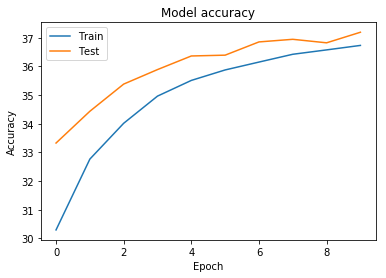

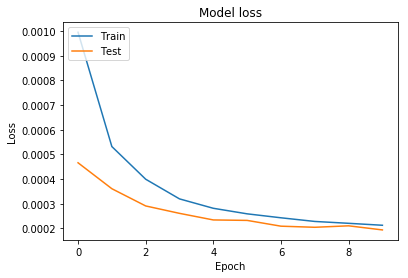

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['tf_psnr'])
plt.plot(history.history['val_tf_psnr'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

UNet model with batch normalization. Trying to understand why batch normalization degrading the performance.





In [0]:
inputs = Input((None, None,1))
c1 = Conv2D(8, (3, 3), padding='same') (inputs)
c1 = BatchNormalization()(c1)
c1 = Activation('relu')(c1)

c1 = Conv2D(8, (3, 3), padding='same') (c1)
c1 = BatchNormalization()(c1)
c1 = Activation('relu')(c1)

p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), padding='same') (p1)
c2 = BatchNormalization()(c2)
c2 = Activation('relu')(c2)

c2 = Conv2D(16, (3, 3), padding='same') (c2)
c2 = BatchNormalization()(c2)
c2 = Activation('relu')(c2)

p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), padding='same') (p2)
c3 = BatchNormalization()(c3)
c3 = Activation('relu')(c3)

c3 = Conv2D(32, (3, 3), padding='same') (c3)
c3 = BatchNormalization()(c3)
c3 = Activation('relu')(c3)

p3 = MaxPooling2D((2, 2)) (c3)

c5 = Conv2D(64, (3, 3), padding='same') (p3)
c5 = BatchNormalization()(c5)
c5 = Activation('relu')(c5)

c5 = Conv2D(64, (3, 3), padding='same') (c5)
c5 = BatchNormalization()(c5)
c5 = Activation('relu')(c5)

p5 = MaxPooling2D(pool_size=(2, 2)) (c5)

c55 = Conv2D(128, (3, 3), padding='same') (p5)
c55 = BatchNormalization()(c55)
c55 = Activation('relu')(c55)

c55 = Conv2D(128, (3, 3), padding='same') (c55)
c55 = BatchNormalization()(c55)
c55 = Activation('relu')(c55)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c55)
u6 = concatenate([u6, c5])

c6 = Conv2D(64, (3, 3), padding='same') (u6)
c6 = BatchNormalization()(c6)
c6 = Activation('relu')(c6)

c6 = Conv2D(64, (3, 3), padding='same') (c6)
c6 = BatchNormalization()(c6)
c6 = Activation('relu')(c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])

c7 = Conv2D(32, (3, 3), padding='same') (u7)
c7 = BatchNormalization()(c7)
c7 = Activation('relu')(c7)

c7 = Conv2D(32, (3, 3), padding='same') (c7)
c7 = BatchNormalization()(c7)
c7 = Activation('relu')(c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])

c8 = Conv2D(16, (3, 3), padding='same') (u8)
c8 = BatchNormalization()(c8)
c8 = Activation('relu')(c8)

c8 = Conv2D(16, (3, 3), padding='same') (c8)
c8 = BatchNormalization()(c8)
c8 = Activation('relu')(c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1])

c9 = Conv2D(8, (3, 3), padding='same') (u9)
c9 = BatchNormalization()(c9)
c9 = Activation('relu')(c9)

c9 = Conv2D(8, (3, 3), padding='same') (c9)
c9 = BatchNormalization()(c9)
c9 = Activation('relu')(c9)

output_img = Conv2D(1, (1, 1)) (c9)
subtracted = keras.layers.Subtract()([inputs, output_img])


unet_bn_model = Model(inputs=[inputs], outputs=[subtracted])
unet_bn_model.compile(optimizer='adam', loss='mse', metrics=[tf_psnr])


In [0]:
unet_bn_model.fit(sparseview_60_train, ndct_train, validation_split=0.05, batch_size=30, epochs=10)



Train on 3420 samples, validate on 180 samples
Epoch 1/10
3420/3420 [==============================] - 111s 33ms/step - loss: 0.0325 - tf_psnr: 20.9350 - val_loss: 0.0036 - val_tf_psnr: 24.4704
Epoch 2/10
3420/3420 [==============================] - 95s 28ms/step - loss: 0.0023 - tf_psnr: 26.4167 - val_loss: 0.0063 - val_tf_psnr: 23.8599
Epoch 3/10
3420/3420 [==============================] - 95s 28ms/step - loss: 0.0017 - tf_psnr: 27.6828 - val_loss: 0.0013 - val_tf_psnr: 28.8096
Epoch 4/10
3420/3420 [==============================] - 95s 28ms/step - loss: 0.0014 - tf_psnr: 28.5267 - val_loss: 0.0011 - val_tf_psnr: 29.7070
Epoch 5/10
3420/3420 [==============================] - 94s 28ms/step - loss: 0.0012 - tf_psnr: 29.0620 - val_loss: 9.8188e-04 - val_tf_psnr: 30.1065
Epoch 6/10
3420/3420 [==============================] - 95s 28ms/step - loss: 0.0011 - tf_psnr: 29.5059 - val_loss: 9.4077e-04 - val_tf_psnr: 30.2829
Epoch 7/10
3420/3420 [==============================] - 95s 28ms/ste

In [0]:
reconstructed = unet_bn_model.predict(sparseview_60_test)
psnr = cal_psnr(ndct_test, reconstructed)
print("psnr 10 epochs.....",psnr)


psnr 10 epochs..... 29.920829251312444


psnr 10 epochs..... 29.920829251312444

In [26]:
inputs = Input((None, None,1))
c1 = Conv2D(8, (3, 3), padding='same') (inputs)
c1 = BatchNormalization(axis= -1)(c1)
c1 = Activation('relu')(c1)

c1 = Conv2D(8, (3, 3), padding='same') (c1)
c1 = BatchNormalization(axis=-1)(c1)
c1 = Activation('relu')(c1)

p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), padding='same') (p1)
c2 = BatchNormalization(axis=-1)(c2)
c2 = Activation('relu')(c2)

c2 = Conv2D(16, (3, 3), padding='same') (c2)
c2 = BatchNormalization(axis=-1)(c2)
c2 = Activation('relu')(c2)

p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), padding='same') (p2)
c3 = BatchNormalization(axis=-1)(c3)
c3 = Activation('relu')(c3)

c3 = Conv2D(32, (3, 3), padding='same') (c3)
c3 = BatchNormalization(axis=-1)(c3)
c3 = Activation('relu')(c3)

p3 = MaxPooling2D((2, 2)) (c3)

c5 = Conv2D(64, (3, 3), padding='same') (p3)
c5 = BatchNormalization(axis=-1)(c5)
c5 = Activation('relu')(c5)

c5 = Conv2D(64, (3, 3), padding='same') (c5)
c5 = BatchNormalization(axis=-1)(c5)
c5 = Activation('relu')(c5)

p5 = MaxPooling2D(pool_size=(2, 2)) (c5)

c55 = Conv2D(128, (3, 3), padding='same') (p5)
c55 = BatchNormalization(axis=-1)(c55)
c55 = Activation('relu')(c55)

c55 = Conv2D(128, (3, 3), padding='same') (c55)
c55 = BatchNormalization(axis=-1)(c55)
c55 = Activation('relu')(c55)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c55)
u6 = concatenate([u6, c5])

c6 = Conv2D(64, (3, 3), padding='same') (u6)
c6 = BatchNormalization(axis=-1)(c6)
c6 = Activation('relu')(c6)

c6 = Conv2D(64, (3, 3), padding='same') (c6)
c6 = BatchNormalization(axis=-1)(c6)
c6 = Activation('relu')(c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])

c7 = Conv2D(32, (3, 3), padding='same') (u7)
c7 = BatchNormalization(axis=-1)(c7)
c7 = Activation('relu')(c7)

c7 = Conv2D(32, (3, 3), padding='same') (c7)
c7 = BatchNormalization(axis=-1)(c7)
c7 = Activation('relu')(c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])

c8 = Conv2D(16, (3, 3), padding='same') (u8)
c8 = BatchNormalization(axis=-1)(c8)
c8 = Activation('relu')(c8)

c8 = Conv2D(16, (3, 3), padding='same') (c8)
c8 = BatchNormalization(axis=-1)(c8)
c8 = Activation('relu')(c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1])

c9 = Conv2D(8, (3, 3), padding='same') (u9)
c9 = BatchNormalization(axis=-1)(c9)
c9 = Activation('relu')(c9)

c9 = Conv2D(8, (3, 3), padding='same') (c9)
c9 = BatchNormalization(axis=-1)(c9)
c9 = Activation('relu')(c9)

output_img = Conv2D(1, (1, 1)) (c9)
subtracted = keras.layers.Subtract()([inputs, output_img])


unet_bn_model = Model(inputs=[inputs], outputs=[subtracted])
unet_bn_model.compile(optimizer='adam', loss='mse', metrics=[tf_psnr])


W0830 00:32:36.586039 140281081354112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2041: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



In [28]:
history = unet_bn_model.fit(sparseview_60_train, ndct_train, validation_split=0.05, batch_size=30, epochs=10, callbacks =[es])


Train on 3420 samples, validate on 180 samples
Epoch 1/10
3420/3420 [==============================] - 160s 47ms/step - loss: 0.0280 - tf_psnr: 19.2145 - val_loss: 0.0053 - val_tf_psnr: 22.7428
Epoch 2/10
3420/3420 [==============================] - 160s 47ms/step - loss: 0.0023 - tf_psnr: 26.4400 - val_loss: 0.0025 - val_tf_psnr: 26.0422
Epoch 3/10
3420/3420 [==============================] - 159s 47ms/step - loss: 0.0015 - tf_psnr: 28.2326 - val_loss: 0.0015 - val_tf_psnr: 28.3014
Epoch 4/10
3420/3420 [==============================] - 159s 46ms/step - loss: 0.0012 - tf_psnr: 29.1655 - val_loss: 0.0011 - val_tf_psnr: 29.6414
Epoch 5/10
3420/3420 [==============================] - 159s 47ms/step - loss: 0.0011 - tf_psnr: 29.6090 - val_loss: 8.7837e-04 - val_tf_psnr: 30.5844
Epoch 6/10
3420/3420 [==============================] - 159s 46ms/step - loss: 9.8978e-04 - tf_psnr: 30.0504 - val_loss: 8.3561e-04 - val_tf_psnr: 30.8102
Epoch 7/10
3420/3420 [==============================] - 159

In [29]:
reconstructed = unet_bn_model.predict(sparseview_60_test)
psnr = cal_psnr(ndct_test, reconstructed)
print("psnr 10 epochs.....",psnr)

psnr 10 epochs..... 29.02017432591879


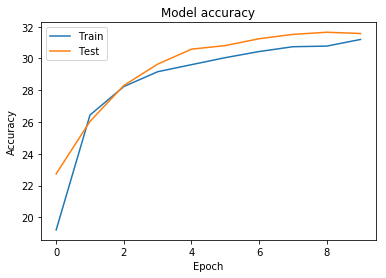

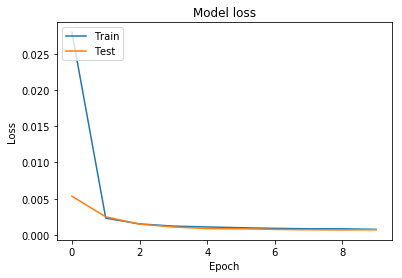

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['tf_psnr'])
plt.plot(history.history['val_tf_psnr'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()